Forecasting stock prices using Technical indicators

The process of predicting stock prices can involve analyzing several factors, such as price trends, benchmark indices, volatility, and moving averages. By analyzing these factors, we can make informed predictions about the future movements of a stock's price.

One factor to consider is the price trend of the stock. This involves examining historical price data to identify patterns and trends in the price movements. If the stock has a consistent upward or downward trend, we can use this information to make predictions about future price movements.

Another factor to consider is the performance of benchmark indices. Benchmark indices represent the overall performance of the stock market and can be used to identify broader trends in the market. By comparing a stock's performance to that of the benchmark indices, we can gain insights into how the stock is likely to perform in the future.

Volatility is another important factor to consider when forecasting stock prices. Volatility refers to the degree of fluctuation in a stock's price over a given period. If a stock is highly volatile, its price is likely to experience more significant fluctuations, making it more challenging to predict its future movements accurately.

Finally, we can use moving averages to analyze historical price data and identify trends in the stock's price movements. Moving averages smooth out fluctuations in price data and can help us identify long-term trends in a stock's price movements.

By analyzing these factors, we can make informed predictions about the future movements of a stock's price.

Through the Yahoo Finance API, we are obtaining data on stock prices. The next step is data cleaning and preparation. The data may be of different quality, for example, there may be missing values, the data may be in incorrect format or with different scales. Therefore, we need to ensure that the data is suitable for our analysis.

The code selects only the necessary columns from the data, removes missing values from the data, and converts the data into a NumPy array. Using a NumPy array can be convenient as it allows for fast computation and data processing. Printing the obtained data is simply to ensure that we have received the correct data and that the data is suitable for analysis.

The technical indicators that support the rise of a security (opposite for a decline) are:

    1. Market indices are in an uptrend, especially those strongly correlated with the security.
    2. The security itself is in an uptrend.
    3. The volatility of the security is low, especially if it is below a certain level.
    4. The price of the security is higher than its respective moving average.
    5. The trend of the respective moving average is upward.

The corresponding technical indicators need to be fine-tuned for each different security.

In [10]:
beginning = "2019-01-01"
end = "2023-03-18"
code = "AAPL"

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load data using Yahoo Finance API
data = yf.download(code, start=beginning, end=end)

#Select only necessary columns
data = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

#Remove missing values from the data
data = data.dropna()

#Convert data into a NumPy array
X = np.array(data)

#Display the structure of the data
print(X.shape)
print(data.head())
print(data.tail())

[*********************100%***********************]  1 of 1 completed
(1061, 6)
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-12-31  39.632500  39.840000  39.119999  39.435001  38.003689  140014000
2019-01-02  38.722500  39.712502  38.557499  39.480000  38.047050  148158800
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.257278  365248800
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.719696  234428400
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.640186  219111200
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-03-13  147.809998  153.139999  147.699997  150.470001  150.470001   
2023-03-14  151.279999  153.399994  150.100006  152.589996  152.589996   
2023-03-15  151.190002  153.250000  149.919998  152.990005  152.990005   
2023-03-16  

In [12]:
# Major Indices

start_date = beginning
end_date = end

#Load data for S&P 500 Index from 2020-01-01 to 2022-02-28
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start=start_date, end=end_date)

#Load data for Nasdaq Composite Index
nasdaq = yf.Ticker("^IXIC")
nasdaq_data = nasdaq.history(start=start_date, end=end_date)

#Load data for Dow Jones Industrial Average
dowjones = yf.Ticker("^DJI")
dowjones_data = dowjones.history(start=start_date, end=end_date)

In [13]:
# Adjusting initial values of indices to the stock price using corresponding multipliers
k_sp = sp500_data.iloc[0,3] / data.iloc[0,3]
k_n = nasdaq_data.iloc[0,3] / data.iloc[0,3]
k_dj = dowjones_data.iloc[0,3] / data.iloc[0,3]

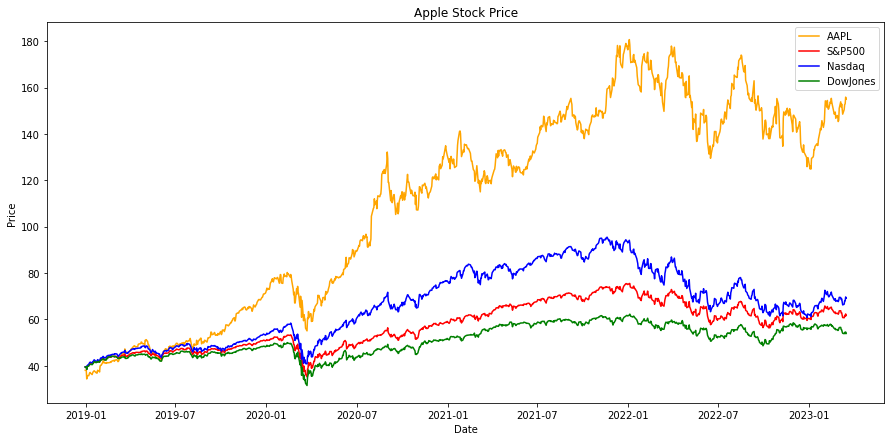

In [14]:
#Plotting simple historical price charts

plt.rcParams["figure.figsize"] = (15,7)
plt.plot(data['Adj Close'],color='orange')
plt.plot(sp500_data['Close']/k_sp,color='red')
plt.plot(nasdaq_data['Close']/k_n,color='blue')
plt.plot(dowjones_data['Close']/k_dj,color='green')
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend([code,'S&P500','Nasdaq','DowJones'])
plt.show()

Moving Average (MA) is a technical analysis indicator that helps smooth out price fluctuations and show the underlying trend over a specified period. It is calculated by adding up a certain number of prices over a given period and dividing the sum by the number of prices in the calculation. As new prices are added, the oldest price is dropped, creating a moving average that "moves" along the price chart. The purpose of the moving average is to identify trend changes and to generate buy or sell signals based on the crossover of the moving average with the price chart. Moving averages are widely used by traders and analysts to help identify support and resistance levels, as well as potential entry and exit points for trades.

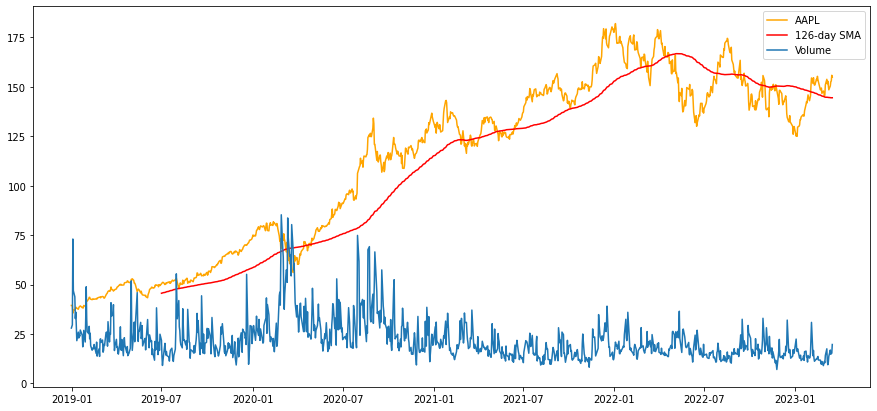

In [15]:
#Calculate the simple moving average for a period of LKD=... days
LKD = 126
sma50 = data["Close"].rolling(window=LKD).mean()

#Plot the graph
plt.plot(data.index, data["Close"],color='orange')
plt.plot(sma50.index, sma50,color='red')
plt.plot(data.index, data["Volume"]/5_000_000)
plt.legend([code, f"{LKD}-day SMA",'Volume'])
plt.show()

Volatility is used as a measure of risk and uncertainty in securities. Mathematically, it is the standard deviation of price changes on an annual basis. Additionally, volatility can create fear and uncertainty among investors, which can affect their investment decisions.

I use ta.volatility.average_true_range, which is a function from TA-Lib (Technical Analysis Library) that allows me to calculate the volatility of a stock price using the ATR (Average True Range) indicator. ATR is a volatility indicator that measures the range of an asset's price movement during each trading period. ATR is typically calculated over the last 14 periods, but I use a longer period.

In [16]:
import ta

# Calculate ATR
data['ATR'] = ta.volatility.average_true_range(data['High'], data['Low'], data['Close'], window=60)

# Print data
print(data.tail())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-03-13  147.809998  153.139999  147.699997  150.470001  150.470001   
2023-03-14  151.279999  153.399994  150.100006  152.589996  152.589996   
2023-03-15  151.190002  153.250000  149.919998  152.990005  152.990005   
2023-03-16  152.160004  156.460007  151.639999  155.850006  155.850006   
2023-03-17  156.080002  156.740005  154.279999  155.000000  155.000000   

              Volume       ATR  
Date                            
2023-03-13  84457100  4.045557  
2023-03-14  73695900  4.033131  
2023-03-15  77167900  4.021412  
2023-03-16  76254400  4.034722  
2023-03-17  98407865  4.008477  


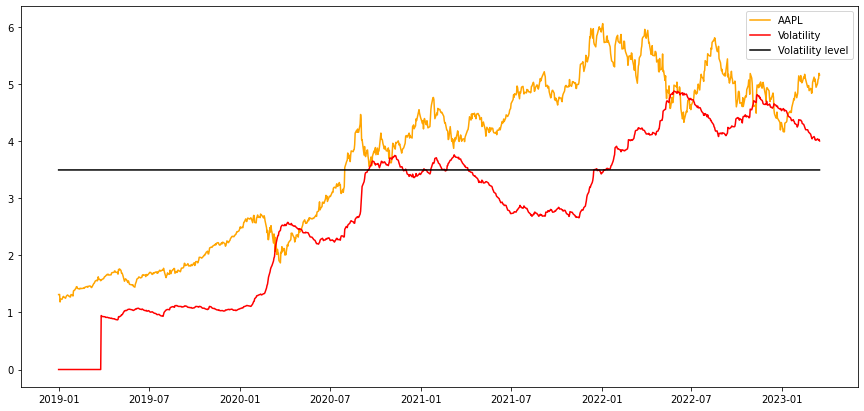

In [17]:
# Plot the graph

plt.plot(data.index, data['Close']/30,color='orange')
plt.plot(data.index, data['ATR'],color='red')
plt.plot(data.index, data['Close']/data['Close']*3.5,color='black')
plt.legend([code,'Volatility','Volatility level'])
plt.show()

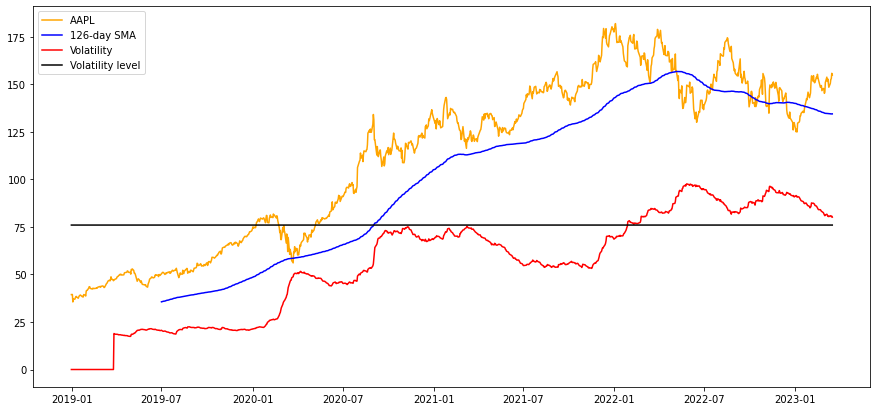

In [18]:
#Plot the graph
factor = 20
volatility_factor = 3.8
sma_shift = -10

plt.plot(data.index, data["Close"],color='orange')
plt.plot(sma50.index, sma50+sma_shift,color='blue')
plt.plot(data.index, data['ATR']*factor,color='red')
plt.plot(data.index, data['Close']/data['Close']*volatility_factor*factor,color='black')
plt.legend([code, f"{LKD}-day SMA",'Volatility','Volatility level'])
plt.show()